<a href="https://colab.research.google.com/github/GithmiHashara/Score-Predictor/blob/main/ScoreCast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Score": [10, 20, 30, 40, 50, 60, 65, 75, 85, 95, 96, 98, 99, 100]
}

df = pd.DataFrame(data)
print("Data:")
print(df)

Data:
    Hours_Studied  Score
0               1     10
1               2     20
2               3     30
3               4     40
4               5     50
5               6     60
6               7     65
7               8     75
8               9     85
9              10     95
10             11     96
11             12     98
12             13     99
13             14    100


In [ ]:
X = np.array(df["Hours_Studied"])
y = np.array(df["Score"])

In [36]:
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)
X = X.astype(np.float32)
y = y.astype(np.float32)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])


In [45]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X, y, epochs= 20000, verbose=0)

In [42]:
hours = np.array([6.5, 7.5, 8.5]).reshape(-1,1)
predicted_scores = model.predict(hours)
print("Predictions for study hours [6.5, 7.5, 8.5]:")
print(predicted_scores)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions for study hours [6.5, 7.5, 8.5]:
[[11.511991]
 [12.971298]
 [14.430605]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


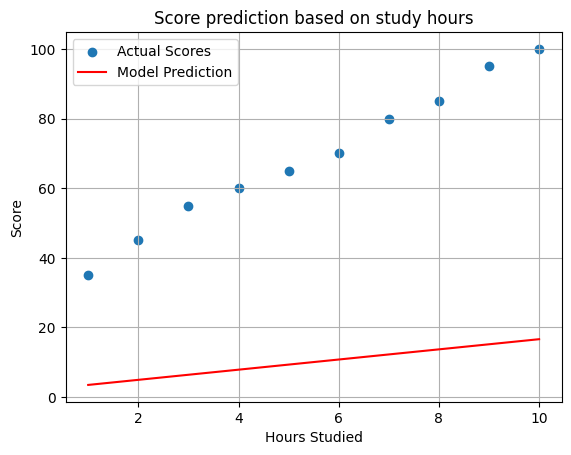

In [44]:
plt.scatter(X, y, label='Actual Scores')
plt.plot(X, model.predict(X), color='red', label='Model Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.title("Score prediction based on study hours")
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


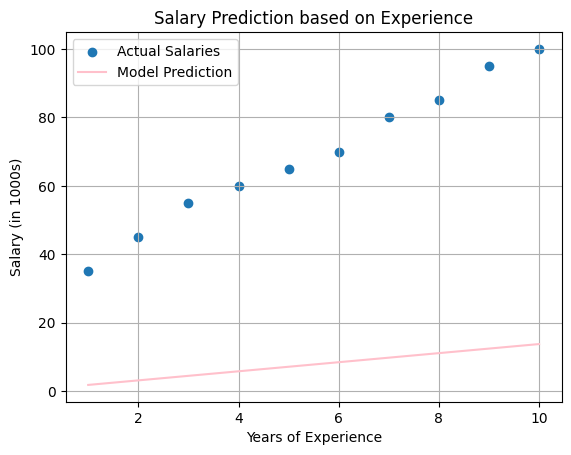

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset: Years of Experience vs Salary
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [35, 45, 55, 60, 65, 70, 80, 85, 95, 100]
}
df = pd.DataFrame(data)

# Prepare data
X = np.array(df["YearsExperience"]).reshape(-1, 1)
y = np.array(df["Salary"]).reshape(-1, 1)

# Build the model (no hidden layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=500, verbose=0)

# Predict
predicted = model.predict(X)

# Plot
plt.scatter(X, y, label='Actual Salaries')
plt.plot(X, predicted, color='red', label='Model Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in 1000s)')
plt.title('Salary Prediction based on Experience')
plt.legend()
plt.grid(True)
plt.show()


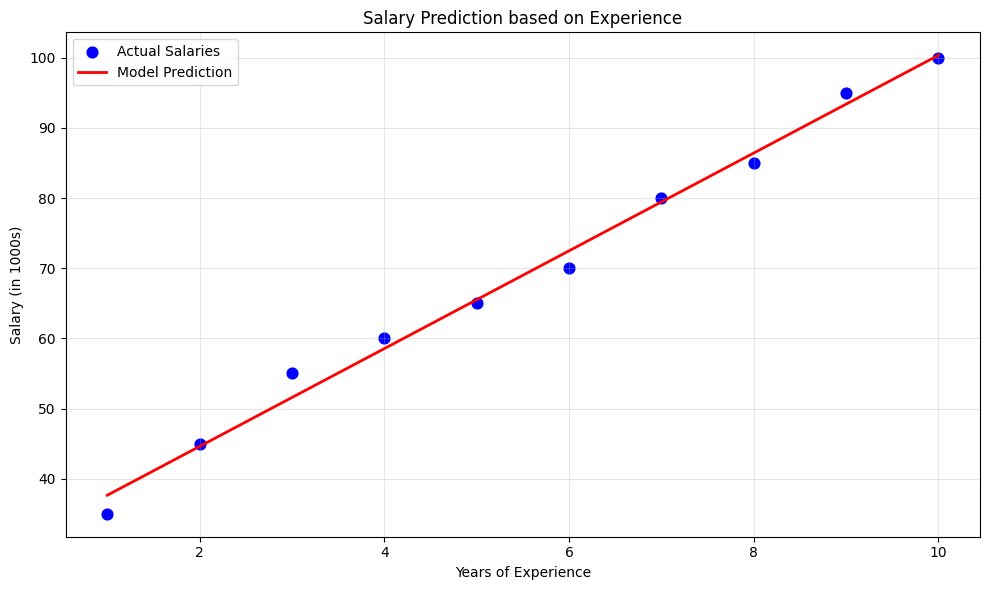

Mean Squared Error: 3.24
Model weights: [array([[0.99597335]], dtype=float32), array([4.5449973e-08], dtype=float32)]

Predictions vs Actual:
Experience: 1 years, Actual: $35k, Predicted: $37.6k
Experience: 2 years, Actual: $45k, Predicted: $44.6k
Experience: 3 years, Actual: $55k, Predicted: $51.6k
Experience: 4 years, Actual: $60k, Predicted: $58.5k
Experience: 5 years, Actual: $65k, Predicted: $65.5k
Experience: 6 years, Actual: $70k, Predicted: $72.5k
Experience: 7 years, Actual: $80k, Predicted: $79.5k
Experience: 8 years, Actual: $85k, Predicted: $86.4k
Experience: 9 years, Actual: $95k, Predicted: $93.4k
Experience: 10 years, Actual: $100k, Predicted: $100.4k


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset: Years of Experience vs Salary
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [35, 45, 55, 60, 65, 70, 80, 85, 95, 100]
}
df = pd.DataFrame(data)

# Prepare data with normalization
X = np.array(df["YearsExperience"]).reshape(-1, 1)
y = np.array(df["Salary"]).reshape(-1, 1)

# Normalize the features for better training
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile with a lower learning rate for better convergence
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

# Train the model
history = model.fit(X_normalized, y_normalized, epochs=1000, verbose=0)

# Make predictions on normalized data
predicted_normalized = model.predict(X_normalized, verbose=0)

# Denormalize predictions back to original scale
predicted = predicted_normalized * y_std + y_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Salaries', s=60)
plt.plot(X, predicted, color='red', linewidth=2, label='Model Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in 1000s)')
plt.title('Salary Prediction based on Experience')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print model performance
mse = np.mean((y - predicted) ** 2)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model weights: {model.get_weights()}")

# Show some predictions
print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Experience: {X[i][0]} years, Actual: ${y[i][0]}k, Predicted: ${predicted[i][0]:.1f}k")

Training the model...
Final training loss: 6.2063
Model equation: Score = 8.58 * Hours + 6.59


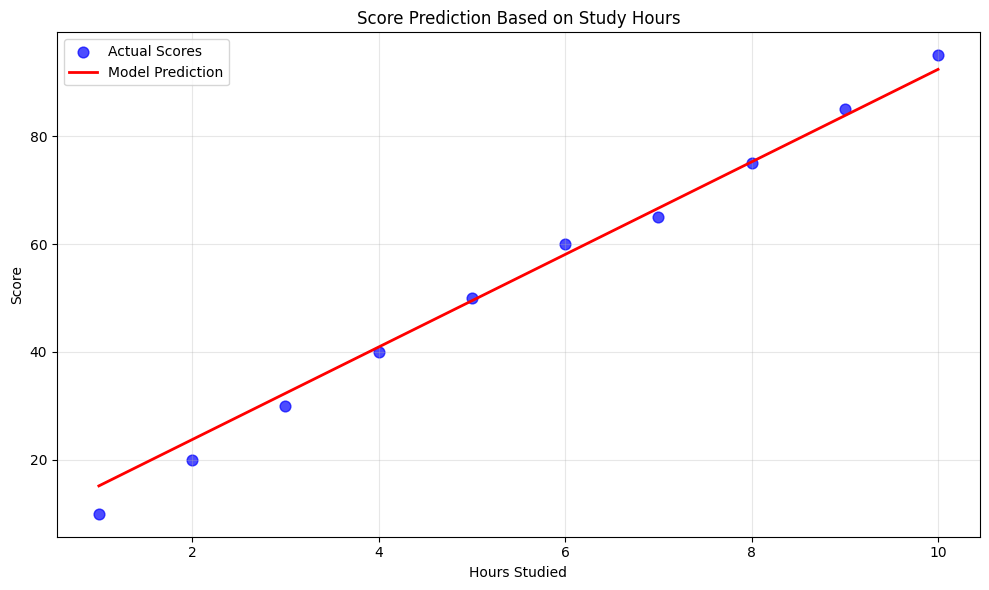


Predictions vs Actual:
Hours: 1, Actual: 10, Predicted: 15.2
Hours: 2, Actual: 20, Predicted: 23.7
Hours: 3, Actual: 30, Predicted: 32.3
Hours: 4, Actual: 40, Predicted: 40.9
Hours: 5, Actual: 50, Predicted: 49.5
Hours: 6, Actual: 60, Predicted: 58.1
Hours: 7, Actual: 65, Predicted: 66.6
Hours: 8, Actual: 75, Predicted: 75.2
Hours: 9, Actual: 85, Predicted: 83.8
Hours: 10, Actual: 95, Predicted: 92.4

R-squared: 0.9913


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Score": [10, 20, 30, 40, 50, 60, 65, 75, 85, 95]
}
df = pd.DataFrame(data)

# Prepare data
X = np.array(df["Hours_Studied"]).reshape(-1, 1)
y = np.array(df["Score"]).reshape(-1, 1)

# Convert to float32 for better TensorFlow performance
X = X.astype(np.float32)
y = y.astype(np.float32)

# Simple Linear Regression Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), use_bias=True)
])

# Compile with appropriate learning rate and optimizer settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae']
)

# Train with more epochs and monitor progress
print("Training the model...")
history = model.fit(X, y, epochs=2000, verbose=0)

# Predict
predicted = model.predict(X, verbose=0)

# Print training results
final_loss = history.history['loss'][-1]
print(f"Final training loss: {final_loss:.4f}")

# Get model parameters
weights, bias = model.get_weights()
print(f"Model equation: Score = {weights[0][0]:.2f} * Hours + {bias[0]:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Scores', s=60, alpha=0.7)
plt.plot(X, predicted, color='red', linewidth=2, label='Model Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Score Prediction Based on Study Hours')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show predictions vs actual
print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Hours: {X[i][0]:.0f}, Actual: {y[i][0]:.0f}, Predicted: {predicted[i][0]:.1f}")

# Calculate R-squared
ss_res = np.sum((y - predicted) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.4f}")